# Understand Time Series Forecast Uncertainty Using Prediction Intervals with Python

* Ref: [https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/](https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/)
* Data: [daily-total-female-births.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv)

## ARIMA
* ARIMA model 的 `fit()` 傳回 ARIMAResults 物件
* ARIMAResults 的 `forecast()` 傳回三個東西
  * forecast: 預測的結果
  * Standard error
  * Prediction interval: 95% 的 prediction interval
    * Prediction interval != Confidence interval
    * 但是 ARIMA 中用 conf_int 來表示 prediction interval
* 見 [The difference between prediction intervals and confidence intervals](https://robjhyndman.com/hyndsight/intervals/)
  * Prediction interval: 一個要被觀察的變數，有多大的機率座落於標示的區間內
    * 95% prediction interval 就是說變數有 95% 的機率會在區間內
  * Confidence interval: 是說這個區間內有多大的機率包含一個不是隨機但是未知的**參數**的正確值
    * 看的是參數 (parameter) 不是變數 (variable, observation)
    * Confidence interval 是由 data 所計算的
    * 95% confidence interval 表示這個區間有 95% 的機率會包含正確的變數值
  * Prediction interval 表示的是 prediction 的 uncertainty
  * Confidence interval 表示的是 population parameters 的 uncertainty

In [ ]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## 1. Load dataset

In [ ]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/daily-total-female-births.csv',
                 header=0,
                 index_col=0)
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 15.7+ KB


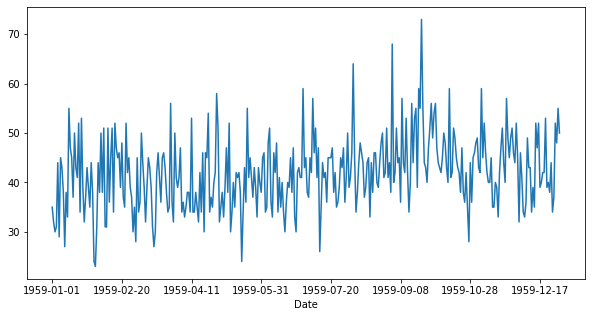

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df['Births'].plot(ax=ax)
plt.show()

## 2. Analysis

## 3. Forecast

In [ ]:
X = df.values
X = X.astype('float32')

# 用最後一個點當作 test 其他全當作 train
size = len(X) - 1
train, test = X[0: size], X[size:]

# 用 ARIMA(5, 1, 1)，這並不是最佳的模型，但是還不錯了
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(5, 1, 1))
model_fit = model.fit(disp=False)

forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 50.000
Forecast: 45.878
Standard Error: 6.996
95% Prediction Interval: 32.167 to 59.590


* 可以設定 $\alpha$ 的值來改變 prediction interval 的大小
  * 預設是 $\alpha=0.05$ 表示 95% prediction interval

In [ ]:
# 用 80%, 90%, 95%, 99% 的 prediction interval
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
  forecast, stderr, conf = model_fit.forecast(alpha=a)
  print('%.1f%% Prediction interval: %.3f between %.3f and %.3f' % ((1 - a)*100, forecast, conf[0][0], conf[0][1]))

80.0% Prediction interval: 45.878 between 36.913 and 54.844
90.0% Prediction interval: 45.878 between 34.371 and 57.386
95.0% Prediction interval: 45.878 between 32.167 and 59.590
99.0% Prediction interval: 45.878 between 27.858 and 63.898


* ARIMAResults 物件的 `plot_predict()` 可以做預測並且畫圖
  * observations
  * forecast
  * prediction interval
* 雖然圖中的結果叫做 confidence interval 但實際上是 prediction interval

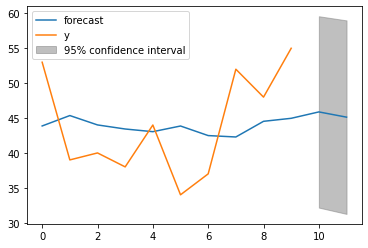

In [ ]:
model_fit.plot_predict(len(train) - 10, len(train) + 1)
plt.show()